In [1]:
import re
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 6))

import random
random.seed(42)

<Figure size 1200x600 with 0 Axes>

In [2]:
file_path = 'ML_test.xlsx'
orig_df = pd.read_excel(file_path)

# Initial Data Exploration

#### Removing the outliers identified from the first notebook

In [3]:
df = orig_df.drop([19,29]).copy().reset_index(drop=True)

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.describe()

,t,H1,H2,cx,cy,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38,p39,p40,p41,p42,p43,p44,p45,p46,p47,p48,p49,p50,p51,p52,p53,p54,p55,p56,p57,p58,p59,p60,p61,p62,p63,p64,p65,p66,p67,p68,p69,p70,p71,p72,p73,p74,p75,p76,p77,p78,p79,p80,p81,p82,p83,p84,p85,p86,p87,p88,p89,p90,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100,p101,p102,p103,p104,p105,p106,p107,p108,p109,p110,p111
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,45.377460,0.104548,0.178262,6.119339,11.286610,-21.932404,-22.154941,-22.384969,-22.626566,-22.878493,-23.139979,-23.413459,-23.697479,-23.993337,-24.298691,-24.616939,-24.946972,-25.291160,-25.645796,-26.016261,-26.402115,-26.801537,-27.216833,-27.648296,-28.096841,-28.562379,-29.050457,-29.554013,-30.076453,-30.627504,-31.214345,-31.827763,-32.470794,-33.146507,-33.857759,-34.605219,-35.397563,-36.245483,-37.163267,-38.143439,-39.196043,-40.335214,-41.574079,-42.922200,-44.426817,-46.171809,-48.136288,-50.413285,-53.077483,-56.511104,-60.912673,-66.775879,-72.243185,-73.602928,-68.059161,-54.270848,-33.540607,-9.774023,13.643228,33.514626,43.562145,49.580510,53.270857,55.150326,54.705270,50.093219,41.538451,30.231178,18.437707,8.316351,1.273328,-1.773023,-0.947181,-0.529809,-0.569344,-0.949418,-1.531714,-2.266488,-3.113657,-4.059368,-5.076786,-6.146672,-7.254748,-8.388817,-9.545310,-10.746714,-11.968633,-13.206609,-14.456309,-15.711613,-16.966947,-18.208461,-19.491500,-20.790983,-22.102919,-23.429899,-24.774443,-26.149586,-27.564637,-29.063150,-30.993577,-30.171025,-28.473091,-27.215578,-26.252781,-25.491177,-24.875742,-24.368113,-23.940198,-23.578828,-23.272966,-23.001602,-22.763004,-22.549257,-22.360125,-22.187768,-22.033106
std,26.850259,0.061171,0.071609,0.806528,8.923562,3.666915,3.715303,3.762181,3.810760,3.859345,3.908524,3.957333,4.006948,4.056193,4.103172,4.150581,4.196914,4.243337,4.288322,4.333459,4.378205,4.421152,4.462874,4.503528,4.542754,4.580074,4.617819,4.654642,4.691655,4.720104,4.749320,4.779174,4.804967,4.828229,4.849240,4.867505,4.884981,4.900351,4.910408,4.918105,4.922249,4.923254,4.921407,4.921147,4.909380,4.902831,4.889052,4.873866,4.872077,4.839660,4.827659,4.868025,5.495200,6.920676,8.945648,11.034099,12.536062,13.040333,11.945639,9.302089,7.288047,5.641232,3.964293,1.956196,3.142996,10.486574,19.694815,29.535969,38.321591,44.362274,45.978199,43.411865,40.691015,38.231071,36.038479,34.001090,32.093760,30.283880,28.563132,26.919199,25.331635,23.799645,22.319841,20.895298,19.525814,18.216160,16.968516,15.792747,14.701606,13.708054,12.829757,12.084822,11.502201,11.100830,10.895435,10.893325,11.091899,11.485748,12.044785,12.696636,13.525294,12.019803,10.407848,9.245082,8.309110,7.530861,6.852779,6.256803,5.732201,5.271611,4.875709,4.537982,4.276120,4.082754,3.966810,3.932267,3.971777
min,0

In [5]:
df['c_t'] = np.round(np.sqrt( (df['cx'])**2 + (df['cy']**2)),5)

Dropping unnecessary columns:

In [6]:
df.drop(['t','H1','H2','cx','cy'], axis=1, inplace=True)

In [7]:
df.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38,p39,p40,p41,p42,p43,p44,p45,p46,p47,p48,p49,p50,p51,p52,p53,p54,p55,p56,p57,p58,p59,p60,p61,p62,p63,p64,p65,p66,p67,p68,p69,p70,p71,p72,p73,p74,p75,p76,p77,p78,p79,p80,p81,p82,p83,p84,p85,p86,p87,p88,p89,p90,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100,p101,p102,p103,p104,p105,p106,p107,p108,p109,p110,p111,c_t
0,-29.248287,-29.548420,-29.848576,-30.161907,-30.487290,-30.824030,-31.172913,-31.533588,-31.905610,-32.288925,-32.683490,-33.088623,-33.501240,-33.923310,-34.388992,-34.853565,-35.332344,-35.824806,-36.334156,-36.858112,-37.399178,-37.957040,-38.531990,-39.121950,-39.711357,-40.389496,-41.063835,-41.764700,-42.495926,-43.259983,-44.060196,-44.899822,-45.768670,-46.733036,-47.743538,-48.822453,-49.982437,-51.241943,-52.611030,-54.095590,-55.863323,-57.829163,-60.110990,-62.787880,-66.212860,-70.637695,-76.6281,-83.295660,-87.317184,-85.559860,-75.744810,-57.794610,-35.215805,-9.584470,15.6406,29.9410,39.1742,45.9087,51.2622,60.030160,70.961070,83.111580,96.113144,108.737640,118.645770,121.124730,115.64100,112.376600,109.032380,105.903360,102.367645,99.035750,95.710310,92.390724,89.095665,85.796936,82.502495,79.211290,75.921090,72.613976,69.367870,66.117905,62.876470,59.645420,56.421837,53.206345,49.998993,46.795450,43.610340,40.429222,37.250374,34.076385,30.907020,27.742252,24.583008,21.428620,18.280277,15.137117,11.998053,8.865080,5.742258,2.620199,-0.499053,-3.615058,-6.728691,-9.840231,-12.945290,-16.044070,-19.155024,-22.282547,-25.340107,-28.254690,47.68552
1,-27.098244,-27.399952,-27.699362,-28.011700,-28.335566,-28.668419,-29.009981,-29.361269,-29.722021,-30.091934,-30.471304,-30.860626,-31.260147,-31.673664,-32.097958,-32.534386,-32.982490,-33.443460,-33.918800,-34.407390,-34.910340,-35.430256,-35.964417,-36.507534,-37.062200,-37.693966,-38.324932,-38.981690,-39.667760,-40.385735,-41.138966,-41.930122,-42.757397,-43.675880,-44.632660,-45.656002,-46.762146,-47.962147,-49.268913,-50.655296,-52.391970,-54.285522,-56.485817,-59.068813,-62.389168,-66.675610,-72.4534,-78.706180,-82.081230,-79.479904,-69.042470,-51.002605,-28.081682,-3.438485,19.8587,32.6001,40.8639,46.8974,51.7545,58.131447,63.740303,67.414450,68.222560,65.503740,59.507957,51.395240,44.57920,42.087402,39.760520,37.351944,34.915580,32.406593,29.880886,27.413677,24.887999,22.350796,19.813128,17.276804,14.757099,12.282653,9.764029,7.243785,4.724502,2.207556,-0.307504,-2.827001,-5.261230,-7.762012,-10.266798,-12.772305,-15.277687,-17.782848,-20.289425,-22.805908,-25.324163,-27.453865,-29.622300,-30.372720,-30.917645,-31.313194,-31.575100,-31.717470,-31.754108,-31.697620,-31.559334,-31.346674,-31.065903,-30.732502,-30.352780,-29.932987,-29.477518,-28.989510,22.73356
2,-24.618023,-24.892763,-25.174314,-25.468277,-25.773235,-26.086922,-26.409142,-26.740065,-27.081180,-27.432140,-27.792667,-28.162243,-28.535881,-28.932674,-29.339191,-29.757874,-30.190264,-30.635426,-31.094807,-31.570147,-32.060127,-32.566273,-33.090150,-33.625170,-34.154232,-34.787630,-35.411324,-36.061990,-36.743572,-37.458500,-38.210260,-39.001923,-39.823890,-40.747887,-41.712185,-42.745777,-43.861160,-45.077010,-46.405260,-47.798970,-49.554802,-51.472510,-53.701237,-56.336403,-59.650690,-63.967420,-69.8102,-75.710815,-78.354050,-74.727660,-62.849186,-43.591170,-20.275723,3.853286,25.5994,37.0943,44.4442,49.6615,53.6304,57.414486,58.389973,55.824150,49.477787,40.238075,29.402029,19.817057,13.79970,12.562622,11.295757,9.862575,8.305807,6.682672,5.030679,3.397686,1.730463,0.054610,-1.618178,-3.279673,-4.848453,-6.540565,-8.229444,-9.913801,-11.595564,-13.274780,-14.947887,-16.535341,-18.162214,-19.833559,-21.509022,-23.187231,-24.870644,-26.562523,-28.273060,-30.018185,-31.822344,-33.597324,-34.715458,-34.217167,-33.605118,-32.954285,-32.288960,-31.623138,-30.965536,-30.321342,-29.693792,-29.085705,-28.499702,-27.933704,-27.387848,-26.861580,-26.353520

In [8]:
pos_per_sensor = []
for i in np.arange(len(df.columns) - 1):
    pos_per_sensor.append((df[f'p{i}'] > 0).any())

In [9]:
positive_indices = np.where(pos_per_sensor)

In [10]:
pos_columns = [f'p{i}' for i in positive_indices[0]]
pos_columns.append('c_t')

df[pos_columns].head()

,p52,p53,p54,p55,p56,p57,p58,p59,p60,p61,p62,p63,p64,p65,p66,p67,p68,p69,p70,p71,p72,p73,p74,p75,p76,p77,p78,p79,p80,p81,p82,p83,p84,p85,p86,p87,p88,p89,p90,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100,p101,c_t
0,-35.215805,-9.584470,15.6406,29.9410,39.1742,45.9087,51.2622,60.030160,70.961070,83.111580,96.113144,108.737640,118.645770,121.124730,115.64100,112.376600,109.032380,105.903360,102.367645,99.035750,95.710310,92.390724,89.095665,85.796936,82.502495,79.211290,75.921090,72.613976,69.367870,66.117905,62.876470,59.645420,56.421837,53.206345,49.998993,46.795450,43.610340,40.429222,37.250374,34.076385,30.907020,27.742252,24.583008,21.428620,18.280277,15.137117,11.998053,8.865080,5.742258,2.620199,47.68552
1,-28.081682,-3.438485,19.8587,32.6001,40.8639,46.8974,51.7545,58.131447,63.740303,67.414450,68.222560,65.503740,59.507957,51.395240,44.57920,42.087402,39.760520,37.351944,34.915580,32.406593,29.880886,27.413677,24.887999,22.350796,19.813128,17.276804,14.757099,12.282653,9.764029,7.243785,4.724502,2.207556,-0.307504,-2.827001,-5.261230,-7.762012,-10.266798,-12.772305,-15.277687,-17.782848,-20.289425,-22.805908,-25.324163,-27.453865,-29.622300,-30.372720,-30.917645,-31.313194,-31.575100,-31.717470,22.73356
2,-20.275723,3.853286,25.5994,37.0943,44.4442,49.6615,53.6304,57.414486,58.389973,55.824150,49.477787,40.238075,29.402029,19.817057,13.79970,12.562622,11.295757,9.862575,8.305807,6.682672,5.030679,3.397686,1.730463,0.054610,-1.618178,-3.279673,-4.848453,-6.540565,-8.229444,-9.913801,-11.595564,-13.274780,-14.947887,-16.535341,-18.162214,-19.833559,-21.509022,-23.187231,-24.870644,-26.562523,-28.273060,-30.018185,-31.822344,-33.597324,-34.715458,-34.217167,-33.605118,-32.954285,-32.288960,-31.623138,15.37878
3,-13.479622,10.302145,30.7113,41.3696,47.9292,52.3017,55.2025,56.397710,53.387215,45.826973,34.482994,21.098616,8.332453,-1.391462,-5.74035,-5.799013,-5.958028,-6.476813,-7.237082,-8.147051,-9.153537,-10.261732,-11.427595,-12.618000,-13.817810,-15.016896,-16.179235,-17.361414,-18.555267,-19.743565,-20.924782,-22.097486,-23.258140,-24.348759,-25.489330,-26.656515,-27.826824,-29.002130,-30.189125,-31.393818,-32.633780,-33.933700,-35.369503,-37.262215,-37.341960,-36.098778,-34.809727,-33.576042,-32.416940,-31.328577,11.00971
4,-8.618195,14.872669,34.5479,44.3963,50.3365,54.0282,56.0329,55.272660,49.507973,39.022415,24.620724,9.265339,-4.283463,-13.296239,-16.49500,-15.318910,-14.450094,-14.043239,-14.222736,-14.564209,-15.043991,-15.606448,-16.287632,-17.042627,-17.840073,-18.665304,-19.500156,-20.293839,-21.160252,-22.034477,-22.909975,-23.785050,-24.659030,-25.561983,-26.344784,-27.196468,-28.066340,-28.947748,-29.843592,-30.763683,-31.722553,-32.742702,-33.931526,-35.519210,-35.372395,-33.769493,-32.242140,-30.886757,-29.666350,-28.571186,9.46737


It is noticed that recordings are seen in both directions (-ve and +ve values), and that some sensors do not record +ve values at all and vice versa, which gives insight on the location of the sensor on the car.

Using the surface pressure data recorded by sensors, a surrogate model is to be constructed:

<center> $C_\text{total} = g(p_0,..,p_\text{111})$

# <center> Part 3

### Visualisations

####  Parallel Coordinates Plot

A Parallel Coordinates Plot can be used to display high dimensional data on a 2-D plot. Where:
- Each feature (pressure sensor) is represented by a vertical axis.
- Each datapoint is represented by a line that connects the values on the vertical axes (sensors).

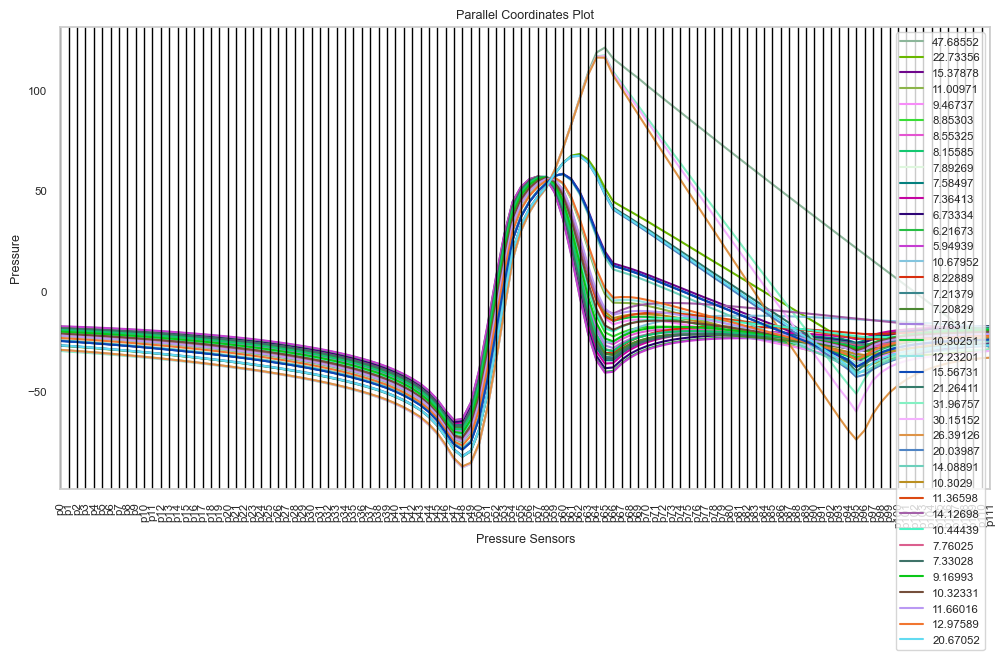

In [11]:
sns.set(style='whitegrid', palette='muted', font_scale=0.75)
plt.figure(figsize=(12, 6))
parallel_coordinates(df, class_column='c_t')
plt.xticks(rotation=90)
plt.title('Parallel Coordinates Plot')
plt.xlabel('Pressure Sensors')
plt.ylabel('Pressure')
plt.show()

Inspecting the **Parallel Coordinates Plot** showcases a _pattern_ that _most_ data points follow. These patterns might generally be capturing aspects of the _shape_ of the vehicle, or more so the areas at which the sensors are placed on the surface of the vehicle (**surface topology**). 
Of course, this showcases a certain pattern with regards to the sensors only, extracting specific details about the vehicle's shape may require more advanced analysis techniques. 

Moreover, The area under each line of this graph could be intuitively interpreted as the approximate **Integration** of the pressure across the surface vehicle. This idea will be touched upon later.

One could even relate these lineplots with **H1** and **H2**, with the highest values of $c_\text{total}$ seen with **very low** H1,H2 values, which by visual inspection **as shown below**, look like they hold the most area under the graph with a specific pattern, unlike _most_ of the datapoints.

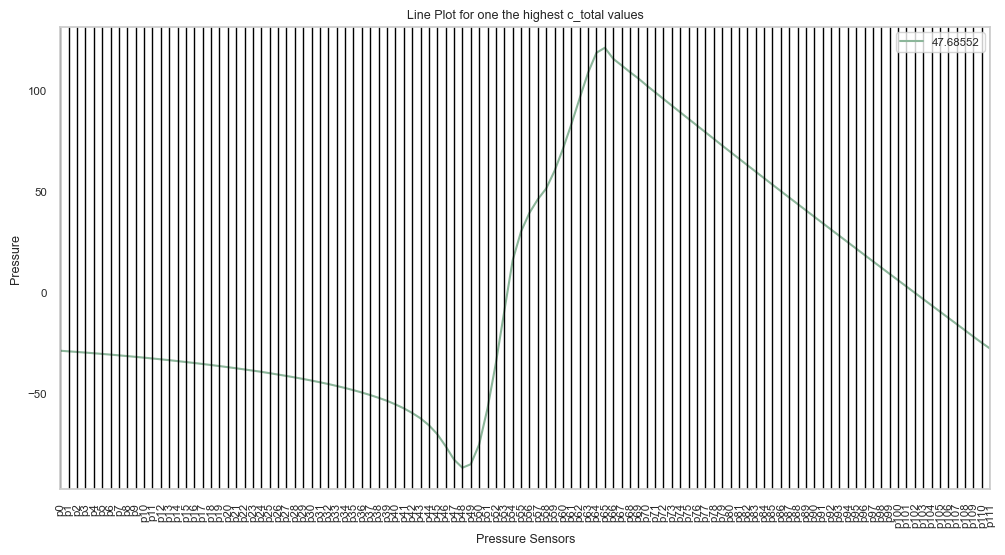

Corresponding H1 and H2 Values: [0.01, 0.01]


In [12]:
sns.set(style='whitegrid', palette='muted', font_scale=0.75)
plt.figure(figsize=(12, 6))

row_to_plot = df.iloc[0]

row_to_plot = row_to_plot.to_frame().T

parallel_coordinates(row_to_plot, class_column='c_t')
plt.xticks(rotation=90)
plt.title('Line Plot for one the highest c_total values')
plt.xlabel('Pressure Sensors')
plt.ylabel('Pressure')
plt.show()
print(f'Corresponding H1 and H2 Values: {[orig_df["H1"].iloc[0], orig_df["H2"].iloc[0]]}')

#### Correlation Matrix Heatmap

In [26]:
correlation_matrix['c_t']

p0     -0.896142
p1     -0.895635
p2     -0.894501
p3     -0.893323
p4     -0.892258
p5     -0.891249
p6     -0.890287
p7     -0.889430
p8     -0.888554
p9     -0.887825
p10    -0.887111
p11    -0.886498
p12    -0.885721
p13    -0.885041
p14    -0.884735
p15    -0.884428
p16    -0.884145
p17    -0.883882
p18    -0.883693
p19    -0.883536
p20    -0.883456
p21    -0.883338
p22    -0.883264
p23    -0.883020
p24    -0.882674
p25    -0.882970
p26    -0.882971
p27    -0.883073
p28    -0.883194
p29    -0.883343
p30    -0.883551
p31    -0.883783
p32    -0.883723
p33    -0.884060
p34    -0.884375
p35    -0.884697
p36    -0.885014
p37    -0.885398
p38    -0.886076
p39    -0.886149
p40    -0.886841
p41    -0.887431
p42    -0.888031
p43    -0.888422
p44    -0.889297
p45    -0.889952
p46    -0.889859
p47    -0.888312
p48    -0.884931
p49    -0.881923
p50    -0.882065
p51    -0.881662
p52    -0.884438
p53    -0.884192
p54    -0.879850
p55    -0.872658
p56    -0.869034
p57    -0.870441
p58    -0.8695

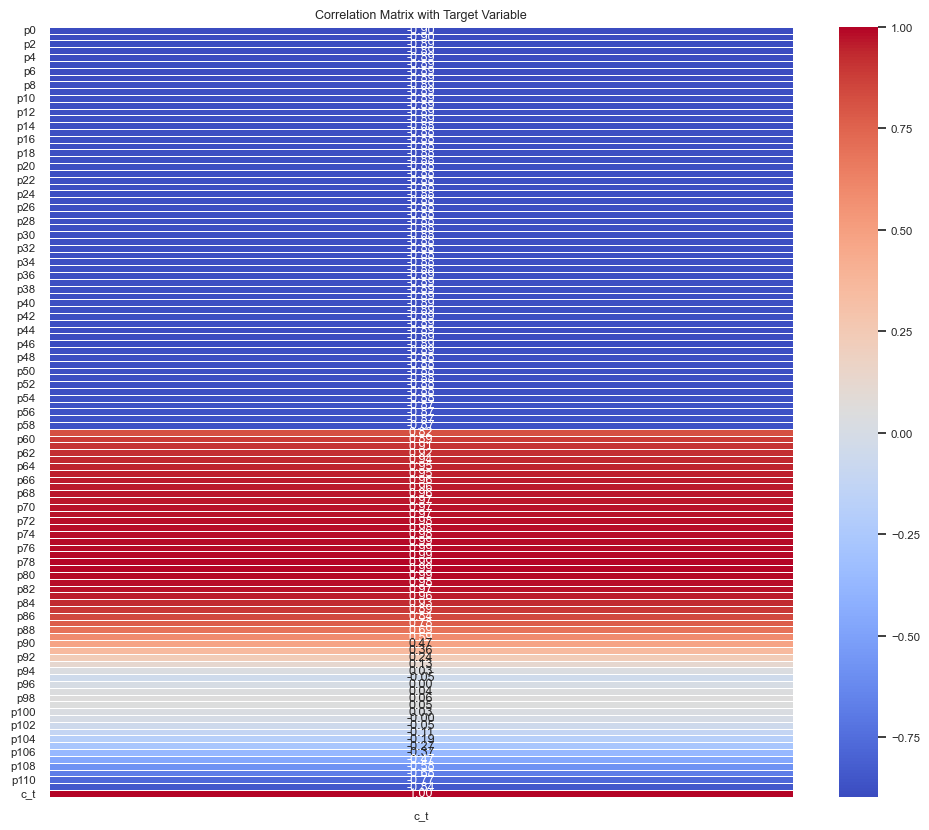

In [25]:
# Plotting the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix['c_t'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix with Target Variable')
plt.show()

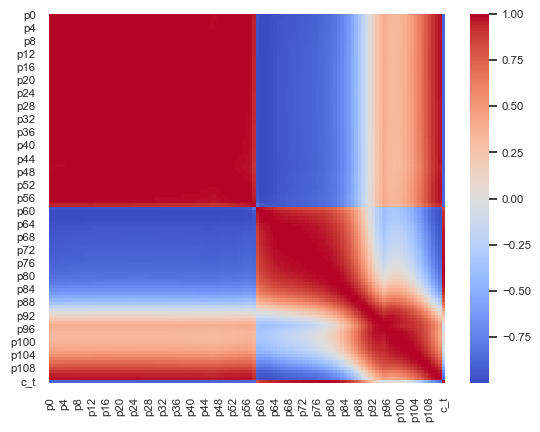

In [15]:
# Building Correlation Matrix Heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

Combining the above correlation heatmap with the previous **Parallel Coordinates Plot** makes sense, there are a couple of things than be inferred from both plots:
 - **High +ve** Correlation from $p_0$ to approximately $p_\text{58}$: As this whole surface area _seen_ from the Parallel Coordinates Plot are continuous and may generally get affected by the aerodynamic pressure in the same way.
 - **High -ve** Correlation betweeen the first 58 sensors until $p_\text{88}$:
 - Vaguely Correlated area between $p_\text{88}$ until $p_\text{104}$: Inferred to be the "dent" that is _seen_ in the Parallel Coordinates Plot.

## Modelling

Things to consider:
 - High Dimensionality (112 Input Features)
 - Low dataset size (42 data points)

**Note**: With these considerations in mind, potential models are very much prone to overfitting. And the obvious choice is to peform **Feature Selection**. However, the task in P3 asks to construct the model as $g(p_0,..,p_\text{111})$. Thus, I will proceed as such.

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler

    
training_results = {}
validation_results = {}   

In [27]:
import tensorflow

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K

#Building a standard feed forward neural network architecture 
Neural_Net = keras.Sequential([
    keras.layers.Input(shape=(112,)),  
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  
])

def custom_loss(y_true, y_pred):
    
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    
    return mse_loss

In [16]:
# Function for fitting different models and evaluating them

def FitAndEvaluate(data,model,deep=False):
    
    #shuffled_df = df.sample(frac=1).reset_index(drop=True) 
    #X_p3 = shuffled_df.drop(columns=['c_t']).values
    #y_p3 = shuffled_df['c_t'].values

    model_training_results = {}
    model_validation_results = {}
    
    X_p3 = data.drop(columns=['c_t']).values
    y_p3 = data['c_t'].values

    loo = LeaveOneOut()

    mse_train_list = []
    mse_valid_list = []
    pe_train_list = []
    pe_valid_list = []
    
    # goes iteratively over the data set for Leave One Out Cross Validation
    for train_index, valid_index in loo.split(X_p3):
        X_train, X_valid = X_p3[train_index], X_p3[valid_index]
        y_train, y_valid = y_p3[train_index], y_p3[valid_index]
        
        if (deep):
            model.compile(optimizer='adam', loss=custom_loss)
            model.fit(X_train, y_train, epochs=20, batch_size=4, verbose = 0, validation_data=(X_valid, y_valid))
            model_name = 'Neural Net'
        else:
            model.fit(X_train, y_train)
            # Extract Model name
            model_instance_string = str(model)
            model_name_match = re.match(r'([a-zA-Z]+)', model_instance_string)
            model_name = model_name_match.group(1)

        y_pred_train = model.predict(X_train)
        y_pred = model.predict(X_valid)
        train_pe = np.abs((y_train - y_pred_train) / y_train) * 100
        valid_pe = np.abs((y_valid - y_pred) / y_valid) * 100
        train_mse = mean_squared_error(y_train, y_pred_train)
        valid_mse = mean_squared_error(y_valid, y_pred)
        
        #list of all the errors for every data point
        mse_train_list.append(train_mse)
        mse_valid_list.append(valid_mse)
        pe_train_list.append(train_pe)
        pe_valid_list.append(valid_pe)

    mse_train = np.mean(mse_train_list)
    mse_valid = np.mean(mse_valid_list)
    pe_train = np.mean(pe_train_list)
    pe_valid = np.mean(pe_valid_list)

    print(f'Done Training {model_name}')
    
    
    return mse_train, pe_train, mse_valid, pe_valid


#### Algorithm Options:
 - **Linear Regression:** Suitable for small datasets, but might be too simple.
 - **Lasso Regression:** Suitable for high dimensional data to perform inherent feature selection. 
 - **Ridge Regression:** Suitable for high dimensional data to mitigate multicollinearity issues and stabilize the model.
 - **RandomForestRegressor:** Strong with complex data, but could overfit since the dataset small.
 - **Neural Net:** Very strong with complex data, but needs _alot_ of data.

In [17]:
#Calling the Modelling function and storing the answer in an dictionary

MT,PT,MV,PV = FitAndEvaluate(df,LinearRegression())
training_results['LinearRegression'] = {'MSE':MT, 'Percentage Error': PT}
validation_results['LinearRegression'] = {'MSE':MV, 'Percentage Error': PV}

MT,PT,MV,PV = FitAndEvaluate(df,Lasso(alpha=0.01))
training_results['Lasso'] = {'MSE':MT, 'Percentage Error': PT}
validation_results['Lasso'] = {'MSE':MV, 'Percentage Error': PV}

MT,PT,MV,PV = FitAndEvaluate(df,Ridge(alpha=0.01))
training_results['Ridge'] = {'MSE':MT, 'Percentage Error': PT}
validation_results['Ridge'] = {'MSE':MV, 'Percentage Error': PV}

MT,PT,MV,PV = FitAndEvaluate(df,RandomForestRegressor(n_estimators=25))
training_results['RandomForestRegressor'] = {'MSE':MT, 'Percentage Error': PT}
validation_results['RandomForestRegressor'] = {'MSE':MV, 'Percentage Error': PV}

MT,PT,MV,PV = FitAndEvaluate(df,Neural_Net, deep=True)
training_results['Neural_Net'] = {'MSE':MT, 'Percentage Error': PT}
validation_results['Neural_Net'] = {'MSE':MV, 'Percentage Error': PV}

Done Training LinearRegression
Done Training Lasso
Done Training Ridge
Done Training RandomForestRegressor


1/1 [==============================] - 0s 16ms/step
Done Training Neural Net


**Note:** Very light hyperparameter tuning was applied due to the HDLSS problem.

### Comparing Models

In [18]:
def CompareModels(models_valid_error):
    
    models = [model for model in models_valid_error]
    mse_valid_errors = [error for error in [models_valid_error[model]['MSE'] for model in models_valid_error]]
    percentage_valid_errors = [error for error in [models_valid_error[model]['Percentage Error'] for model in models_valid_error]]
    
    fig, axes = plt.subplots(figsize=(10, 8))

    palette = sns.color_palette("icefire", 5)

    bar_width = 0.35
    index = np.arange(len(models))

    axes.bar(index, mse_valid_errors, bar_width, label='MSE', color=palette[0])
    axes.bar(index + bar_width, percentage_valid_errors, bar_width, label='Percentage Error', color=palette[4])
    axes.set_xlabel('Models')
    axes.set_ylabel('Error Value')
    axes.set_title('Comparison of MSE and Percentage Error in Validation for Different Models')
    axes.set_xticks(index + bar_width / 2)
    axes.set_xticklabels(models, rotation=45)
    axes.legend()

    plt.show()


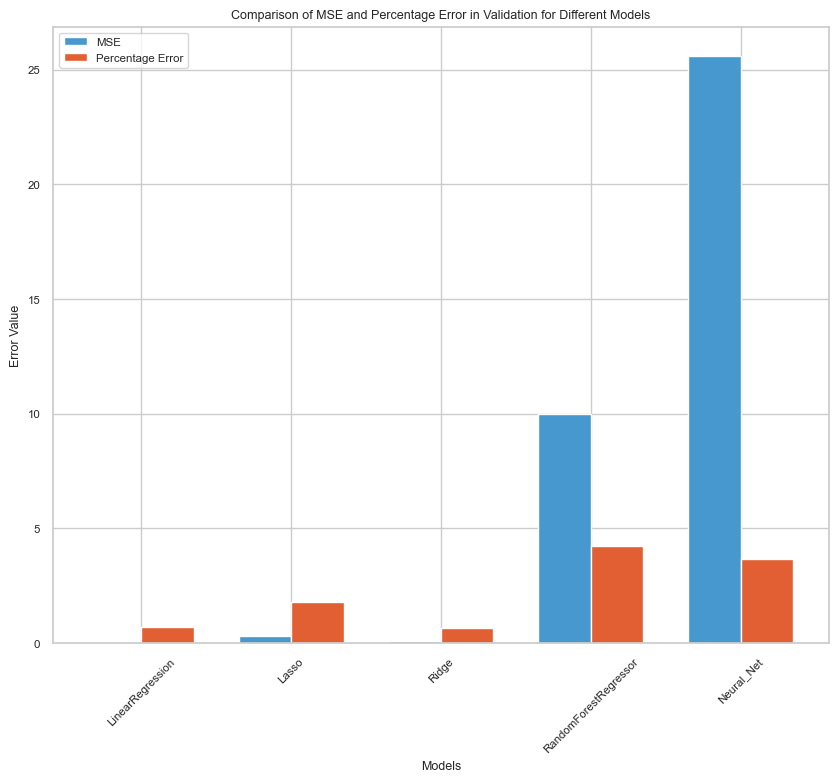

In [19]:
CompareModels(validation_results)

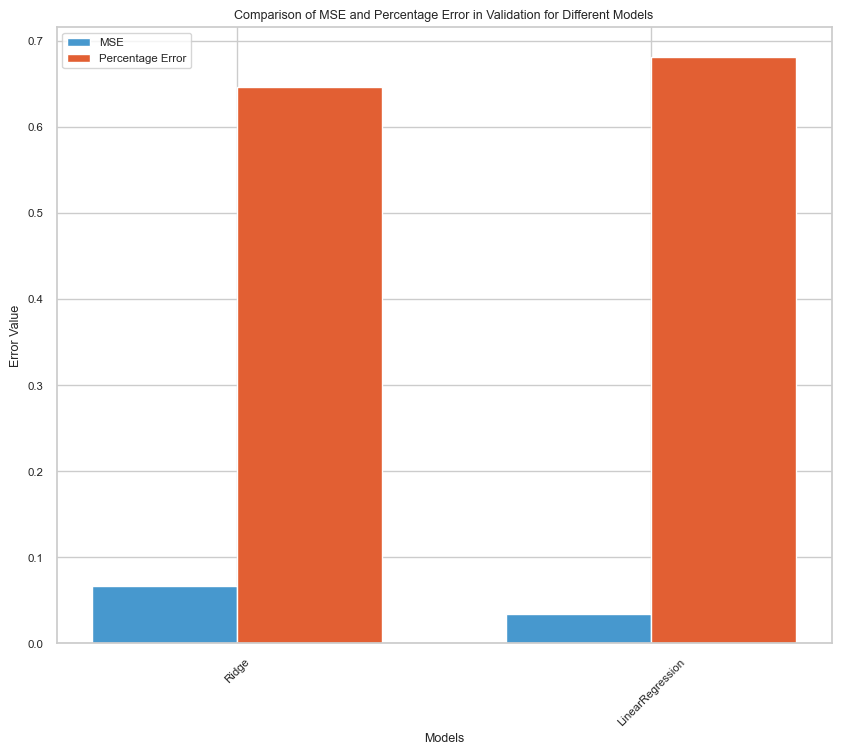

In [20]:
better_models = ['Ridge', 'LinearRegression']

better_models_validation = {model: validation_results[model] for model in better_models}

CompareModels(better_models_validation)

As it can be noticed, the proposed surrogate models perform really well, _perhaps_ **too** well. Which leads to the suspicion that there might be some sort of Bias, Data Leakage, etc. Especially, when it is known that this is a **HDLSS** (High Dimensional Low Sample Size) Dataset.

In the next step, an investigation will be carried out as to ensure validity to these results.

### Regarding Overfitting and Overly-Optimistic Validation results:

The hypothesised models have been validated using the LOOCV technique as to ensure there the validation results are a robust estimate.

### Regarding Data Leakage:

To investigate the possibility of data leakage, Two things will be performed:
 - A random shuffle in the data will be performed everytime, and monitor the results.
 - A **hold out test set** will be taken away from the training/validation step, and an evaluation of the **test set** will be conducted.

The idea between the hold out test set is to negate the possibility of if there being some sort of data leakage in LOOCV (Leave One Out Cross Validation), it would be discovered, as the test set is not involved in the LOOCV splits.

#### Creating a hold-out a test set

In [21]:
from sklearn.model_selection import train_test_split

X_p3 = df.drop(columns=['c_t'])
y_p3 = df['c_t']

X_train, X_test, y_train, y_test = train_test_split(X_p3, y_p3, test_size=0.1)

train_df = pd.concat([X_train, y_train], axis=1)

**Note:** train_test_split() shuffles the data by default to get rid of systematic patterns or biases, so both measures to avoid data leakage are already performed.

Performing the fitting:

In [22]:
Linear_R_Model = LinearRegression()
Ridge_R_Model = Ridge(alpha=0.05)

_,_,Linear_validation_MSE,_ = FitAndEvaluate(train_df,Linear_R_Model)
_,_,Ridge_validation_MSE,_ = FitAndEvaluate(train_df,Ridge_R_Model)

Done Training LinearRegression
Done Training Ridge


In [23]:
Linear_prediction_on_holdout = Linear_R_Model.predict(X_test)
Ridge_prediction_on_holdout = Ridge_R_Model.predict(X_test)

In [24]:
Linear_test_MSE = mean_squared_error(y_test, Linear_prediction_on_holdout)
Ridge_test_MSE = mean_squared_error(y_test, Ridge_prediction_on_holdout)

In [62]:
#print(f'Prediction with LR {Linear_prediction_on_holdout}')
#print(f'True Values: {y_test.values}')
#print(f'Linear Regression Validation MSE: {Linear_validation_MSE} vs Test MSE: {Linear_test_MSE}')
#print('')
#print('')
#print(f'Prediction with Ridge {Ridge_prediction_on_holdout}')
#print(f'True Values: {y_test.values}')
#print(f'Ridge Regression Validation MSE: {Ridge_validation_MSE} vs Test MSE: {Ridge_test_MSE}')

It can be evident that the models are _still_ performing "too" well, we are then only left with a few potential explanations:
 - **Biased Data:**  There is a possibility that the data sampling process introduces bias, and the models might be overfitting to specific characteristics of this biased sample.
 
 - **Random Chance:** On small datasets, there's a higher likelihood of achieving good performance by chance. The models might be learning patterns that coincidentally align with the limited examples in the dataset (training,validation,testing) but are not capturing the true underlying relationships. 

 - **Model is _actually_ correct:** Considering that these pressure sensors emulate the integration of pressure across the vehicle's surface. The models might be capturing the genuine _integration_ across all these pressure sensors with regards to their correlation/area. Which could in fact _this_ accurate.

Given the inherent limitations in addressing the first two possibilities, The last possibility is assumed. There will be evaluations on the predicted $c_\text{total}$ on the test data to see if it matches the prior knowledge of its values.

#### Fitting the "best" model on all the data

In [26]:
from sklearn.pipeline import make_pipeline

p3_best_model = make_pipeline(Ridge(alpha=0.05))

# Fit the model with all the data
p3_best_model.fit(X_p3, y_p3)

Pipeline(steps=[('ridge', Ridge(alpha=0.05))])

#### Evaluating $c_\text{total}$ at the pressure sensor values:

In [27]:
p3_df = pd.read_excel(file_path, sheet_name="P3")

In [28]:
X_test_p3 = p3_df.drop(columns='ctotal')

In [29]:
c_total_predictions =  np.round(p3_best_model.predict(X_test_p3.values),5)

Constructing a Parallel Coordinates Plot:

In [30]:
p3_df['ctotal'] = c_total_predictions

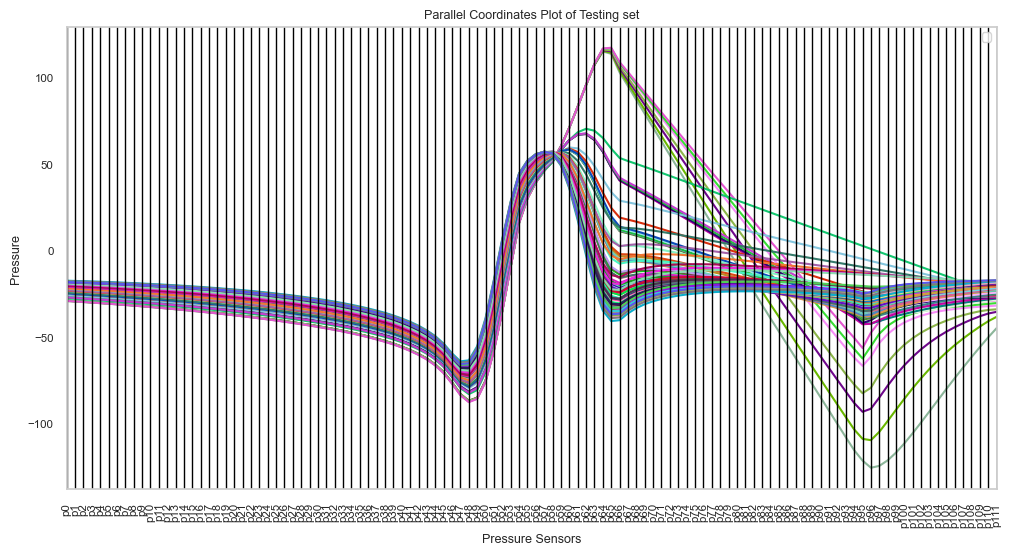

In [31]:
sns.set(style='whitegrid', palette='muted', font_scale=0.75)
plt.figure(figsize=(12, 6))
parallel_coordinates(p3_df, class_column='ctotal')
plt.xticks(rotation=90)
#plt.legend([])  # Add this line to hide the legend
plt.title('Parallel Coordinates Plot of Testing set')
plt.xlabel('Pressure Sensors')
plt.ylabel('Pressure')
plt.legend([])
plt.show()

#### Interpretation

 - It can be seen that the observed pattern in the parallel coordinate plot with the **testing** data is consistent with the patterns seen in the parallel coordinate plot with the **training** data. This consistency indicates a similar sampling distribution between the testing set and the training set.
 - Inspecting both Parallel Coordinates Plots thoroughly with regards to $c_\text{total}$ (the legend of the graph) indicates promising results.

#### Evaluating the area under the graph

One way to superficially test the results, is to approximately compute the area under the graph (resembling integrating over the surface) for all of the lines (data points), and find its **maximum data point**. Then, inspecting the model's prediction for the **highest** $c_\text{total}$, and whether it is the same data point.

**Notes:** 
 - Obviously, the actual values computed from the approximate area under the graph are arbitrary, since we do not have values for the x-axis (distances between the sensors). However, their rankings between eachother would still hold.
 - This method also assumes that, for example: p_10 is further away from p_0 than p_5, which might not necessarily be the case.

Computing the area under the lines:

In [32]:
area_under_all_lines = {}
for index, row in p3_df.iterrows(): 
    
    # Calculate arbitrary area under the line
    area_under_line = 0
    for i in range(len(row) - 1):
        x1, x2 = i, i + 1
        y1, y2 = row.iloc[i], row.iloc[i + 1]
        area_under_line += 0.5 * (x2 - x1) * (y1 + y2)
    
    area_under_all_lines[index] = area_under_line
    
index_with_max_area = max(area_under_all_lines, key=area_under_all_lines.get)

Finding the Highest C_total:

In [33]:
index_with_max_c_total = p3_df['ctotal'].idxmax()

In [34]:
print(f'Index of datapoint with highes area under the graph: {index_with_max_area}')
print(f'Index of datapoint with highest predicted c_total: {index_with_max_c_total}')

Index of datapoint with highes area under the graph: 7
Index of datapoint with highest predicted c_total: 7


Plotting that line:

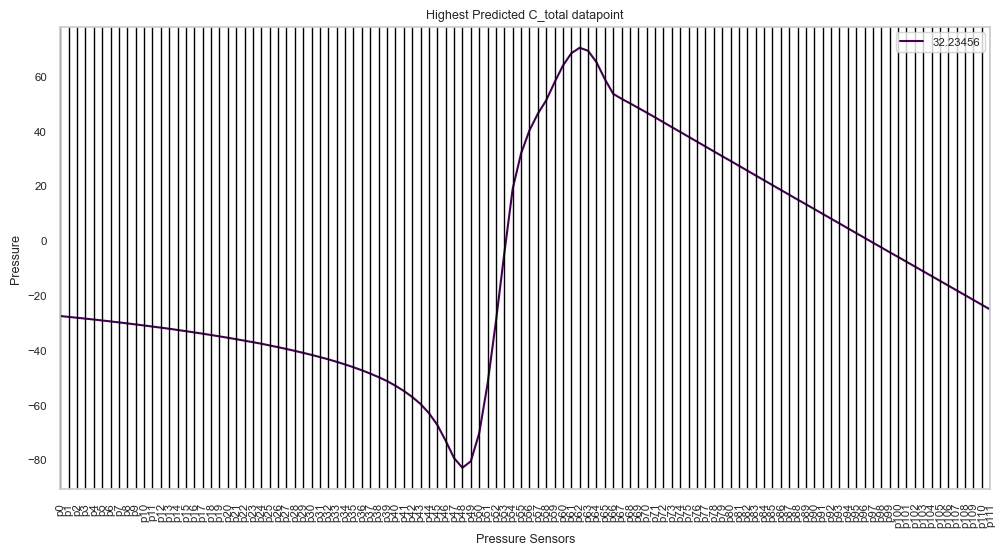

In [35]:
plt.figure(figsize=(12, 6))

row_to_plot = p3_df.iloc[index_with_max_c_total]
row_to_plot = row_to_plot.to_frame().T

parallel_coordinates(row_to_plot, class_column='ctotal', colormap='viridis')
plt.xticks(rotation=90)
plt.title('Highest Predicted C_total datapoint')
plt.xlabel('Pressure Sensors')
plt.ylabel('Pressure')
plt.show()

From that plot, it can be noticed that this datapoint follows a similar pattern to the one datapoint in the training set that had the highest recorded $c_\text{total}$. The pattern that **not** most datapoints follow.

One could even go further and infer from the pattern and the high $c_\text{total}$ that this datapoint was probably recorded at an instance with **really low** H1 and H2 values, since it matches the pattern seen with low (H1,H2) values.

#### Populating $c_\text{total}$ in sheet:

In [36]:
def write_excel(filename,sheetname,dataframe):
    with pd.ExcelWriter(filename, engine='openpyxl', mode='a') as writer: 
        workBook = writer.book
        try:
            workBook.remove(workBook[sheetname])
        except:
            print("Worksheet does not exist")
        finally:
            dataframe.to_excel(writer, sheet_name=sheetname,index=False)

In [37]:
P3_answer = p3_df.copy()

In [38]:
P3_answer

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38,p39,p40,p41,p42,p43,p44,p45,p46,p47,p48,p49,p50,p51,p52,p53,p54,p55,p56,p57,p58,p59,p60,p61,p62,p63,p64,p65,p66,p67,p68,p69,p70,p71,p72,p73,p74,p75,p76,p77,p78,p79,p80,p81,p82,p83,p84,p85,p86,p87,p88,p89,p90,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100,p101,p102,p103,p104,p105,p106,p107,p108,p109,p110,p111,ctotal
0,-28.982658,-29.288567,-29.590267,-29.904104,-30.231222,-30.569240,-30.918127,-31.278296,-31.650967,-32.034700,-32.429436,-32.835625,-33.257410,-33.695896,-34.143692,-34.606216,-35.082405,-35.572170,-36.077640,-36.598930,-37.135410,-37.688470,-38.259235,-38.840622,-39.415115,-40.101925,-40.774574,-41.473110,-42.202076,-42.963997,-43.762066,-44.599230,-45.467636,-46.434790,-47.443874,-48.521168,-49.679577,-50.937534,-52.304504,-53.786150,-55.553207,-57.515953,-59.795220,-62.465454,-65.883250,-70.309440,-76.2978,-82.923920,-86.892365,-85.055214,-75.202240,-57.367660,-34.675380,-9.126734,16.0865,30.2359,39.4239,46.1471,51.5582,60.230545,71.028060,83.017540,95.493540,107.111820,114.950645,113.586390,102.85500,94.928730,86.907670,78.959590,70.949080,62.953438,54.988605,47.093315,39.159527,31.234838,23.311392,15.433975,7.681647,-0.162053,-7.978916,-15.797398,-23.616472,-31.433190,-39.191734,-46.767776,-54.431150,-62.078950,-69.726080,-77.372550,-85.017320,-92.659960,-100.302700,-107.947510,-115.452670,-121.452350,-125.573970,-124.501434,-121.291855,-116.791626,-111.429290,-105.518654,-99.287540,-92.897766,-86.463770,-80.070560,-73.797485,-67.674126,-61.697840,-55.854977,-50.213554,-44.903580,13.74056
1,-29.016563,-29.316793,-29.619753,-29.934702,-30.261896,-30.600769,-30.950520,-31.311130,-31.682945,-32.067642,-32.463432,-32.869610,-33.282024,-33.721306,-34.170326,-34.631400,-35.107210,-35.597730,-36.102184,-36.622536,-37.159560,-37.712185,-38.281357,-38.864320,-39.439888,-40.115420,-40.791817,-41.489906,-42.218120,-42.979420,-43.777027,-44.614456,-45.489475,-46.454384,-47.463974,-48.541290,-49.697388,-50.953728,-52.319878,-53.791390,-55.568330,-57.531560,-59.808678,-62.480625,-65.891110,-70.312400,-76.2982,-82.926254,-86.885880,-85.078540,-75.240800,-57.333050,-34.683685,-9.137894,16.0178,30.1909,39.3875,46.1114,51.5153,60.193750,70.992455,83.017296,95.527540,107.232280,115.254100,114.224560,103.94800,96.420135,88.800130,81.248825,73.638690,66.042610,58.475597,50.974690,43.437393,35.908638,28.380770,20.875395,13.418560,5.962456,-1.485198,-8.925967,-16.357244,-23.743973,-31.068600,-38.281803,-45.551434,-52.820320,-60.083904,-67.347300,-74.609010,-81.864190,-89.135130,-96.343220,-103.459740,-108.883040,-109.642690,-104.821560,-98.553330,-92.034836,-85.632750,-79.514940,-73.762830,-68.410324,-63.458100,-58.905140,-54.750970,-50.919327,-47.351913,-43.996887,-40.925630,-38.354637,18.39326
2,-29.041150,-29.337421,-29.640186,-29.956928,-30.285269,-30.624146,-30.974575,-31.336990,-31.710373,-32.095085,-32.492744,-32.900597,-33.323586,-33.760600,-34.209908,-34.671947,-35.149605,-35.641150,-36.146786,-36.669440,-37.207660,-37.761433,-38.330994,-38.897163,-39.534620,-40.185593,-40.856117,-41.554620,-42.283607,-43.045113,-43.842278,-44.675133,-45.552498,-46.519370,-47.525234,-48.602325,-49.759686,-51.013626,-52.375378,-53.895195,-55.634100,-57.596287,-59.873173,-62.523193,-65.958954,-70.383750,-76.3554,-83.012800,-86.977830,-85.158230,-75.296104,-57.445060,-34.796700,-9.281578,16.0799,30.1826,39.3670,46.0890,51.4927,60.175617,71.004486,83.019940,95.601380,107.417600,115.667670,115.062940,105.36100,98.338740,91.206440,84.081085,76.995380,69.922390,62.880028,55.873703,48.843075,41.817894,34.816113,27.861101,20.972752,14.028173,7.097643,0.165666,-6.766417,-13.673396,-20.538094,-27.338333,-34.146110,-40.951607,-47.748180,-54.539787,-61.321014,-68.088010,-74.877014,-81.557190,-88.161410,-93.253170,-91.452680,-84.975470,-78.112366,-71.846985,-66.286480,-61.382713,-57.064300,-53.263435,-49.913055,-46

In [39]:
#write_excel(file_path,'P3',P3_answer)

# <center> Part 4

In [40]:
p4_test_df =  pd.read_excel(file_path, sheet_name="P4")

In [41]:
X_train_p4 = df.drop(columns=['c_t'])
y_train_p4 = df['c_t']

feature_selection_results = {}

Using the surrogate model selected from **P3** using the **112** pressure sensors, a new hypothesised model with only **20** pressure sensors for optimal accuracy is to be constructed.

It is important to note that in this scenario, there are **only** 20 pressure sensors with their recording to be used. Meaning, the dimensionality reduction techniques that make use of _all_ the input features and transform it to smaller dimensional space can **not** be used.

## Proposed Methods

1. **Feature Importance Ranking from Ridge Regression**

Ridge Regression introduces a regularization term to the linear regression, which inherently penalizes large coefficients when they are not affecting the output significantly. This drives unimportant coefficients to **near-zero** values. The penalty term can then be used to identify which features are contributing the most, simply by selecting the columns with the top 20 coefficients, we would be essentially choosing the 20 most important **sensors**.

2. **Recursive Feature Elimination (RFE)**

RFE is a technique that works similarly to **Feature Importance Ranking**. However, instead of selecting the columns with the top 20 coefficients in one step. It recursively removes the _least_ important feature from the set based on the coefficients  (_Since this is a Ridge Regression model_), and **refitting** the data, until the desired number of features is reached.

Both proposed methods will be implemented and then, compared based on their selection and results.

### Preliminary Baseline Model

Starts at a random point and collects the 20 consecutive features.

In [42]:
starting_point = random.randint(0, 91)
Random_consec_selected_indices = np.arange(starting_point, starting_point+20)

#randomly_selected_indices = np.arange(30)
Random_consec_selected_columns = df.columns[Random_consec_selected_indices]

Random_consec_X_train_subset_p4 = X_train_p4[Random_consec_selected_columns]

Random_consec_p4_subset_model = Ridge(alpha=0.05) 
Random_consec_p4_subset_model.fit(Random_consec_X_train_subset_p4, y_train_p4)

#Testing the new subset-ed model on the testing set
Random_consec_X_test_p4 = p4_test_df[Random_consec_selected_columns]
Random_consec_c_total_predictions_p4 = Random_consec_p4_subset_model.predict(Random_consec_X_test_p4)

Random_consec_sum_of_differences = np.sum(np.abs(c_total_predictions - Random_consec_c_total_predictions_p4))
Random_consec_MSE = mean_squared_error(c_total_predictions,Random_consec_c_total_predictions_p4)

### Baseline Model

This baseline model will randomly select 20 sensors (features) from the 112 sensors.

In [43]:
# Generate 20 random numbers between 0 and 111
randomly_selected_indices = [random.randint(0, 111) for _ in range(20)]

#randomly_selected_indices = np.arange(30)
Random_selected_columns = df.columns[randomly_selected_indices]

Random_X_train_subset_p4 = X_train_p4[Random_selected_columns]

Random_p4_subset_model = Ridge(alpha=0.05) 
Random_p4_subset_model.fit(Random_X_train_subset_p4, y_train_p4)

#Testing the new subset-ed model on the testing set
Random_X_test_p4 = p4_test_df[Random_selected_columns]
Random_c_total_predictions_p4 = Random_p4_subset_model.predict(Random_X_test_p4)

Random_sum_of_differences = np.sum(np.abs(c_total_predictions - Random_c_total_predictions_p4))
Random_MSE = mean_squared_error(c_total_predictions,Random_c_total_predictions_p4)


### Feature Importance Ranking from Ridge

In [44]:
# accessing the ridge model inside the pipeline
FIR_p3_model = p3_best_model.named_steps['ridge']

FIR_p3_model_coefficients = np.abs(FIR_p3_model.coef_)

# Selecting the top 20 features
FIR_selected_indices = np.argsort(FIR_p3_model_coefficients)[-20:]
FIR_selected_columns = df.columns[FIR_selected_indices]

In [45]:
FIR_X_train_subset_p4 = X_train_p4[FIR_selected_columns]

In [46]:
# Training the new subset-ed model with the training data
FIR_p4_subset_model = Ridge(alpha=0.05) 
FIR_p4_subset_model.fit(FIR_X_train_subset_p4, y_train_p4)

Ridge(alpha=0.05)

In [47]:
#Testing the new subset-ed model on the testing set
FIR_X_test_p4 = p4_test_df[FIR_selected_columns]
FIR_c_total_predictions_p4 = FIR_p4_subset_model.predict(FIR_X_test_p4)

Since the testing set in P4 is the same as the testing set in P3, the feature selection methods can be evaluated by comparing the $c_\text{total}$ predictions from the original model (using 112 sensors) with the new $c_\text{total}$ predictions from the new model (using 20 sensors), both visually and quantitatively.

#### Visually

To evaluate the proposed feature selection methods **visually**, a plot showcasing the 112-sensor model predictions and the 20-sensor model predictions and how does the 20-sensor model predictions align with its 112-sensor model counterpart.

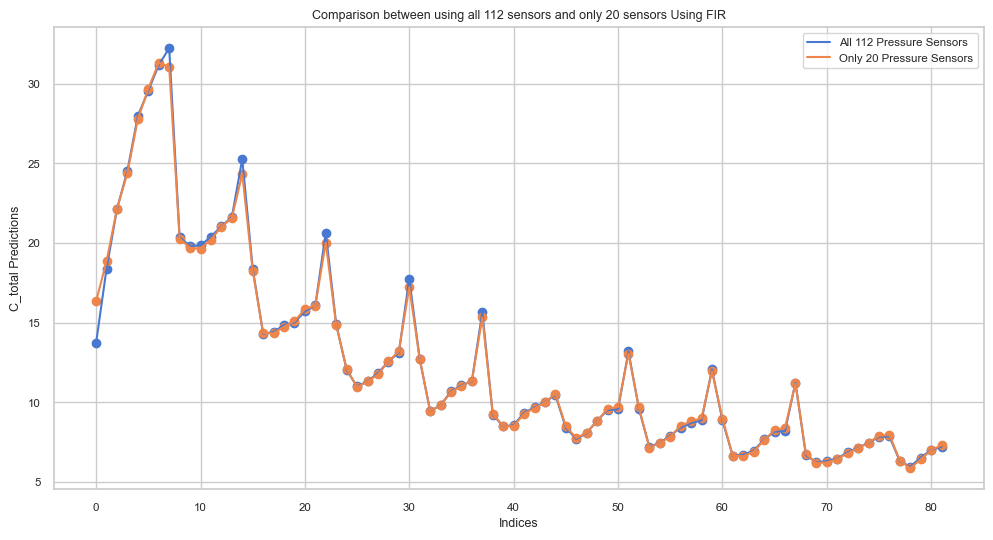

In [48]:
plt.figure(figsize=(12, 6))

# Plotting original predictions and subset-ed predictions on the same plot
plt.plot(np.arange(len(c_total_predictions)), c_total_predictions, label='All 112 Pressure Sensors')
plt.plot(np.arange(len(FIR_c_total_predictions_p4)), FIR_c_total_predictions_p4, label='Only 20 Pressure Sensors')
plt.scatter(np.arange(len(c_total_predictions)), c_total_predictions)
plt.scatter(np.arange(len(FIR_c_total_predictions_p4)), FIR_c_total_predictions_p4)

plt.xlabel('Indices')
plt.ylabel('C_total Predictions')
plt.title('Comparison between using all 112 sensors and only 20 sensors Using FIR')
plt.legend()
plt.show()


It can be noticed that FIR does in fact show promising results with its predictions following _roughly_ the same pattern as the original predictions.

#### Quantitatively

To evaluate the proposed feature selection methods **quantitatively**, one could essentially assume the 112-Sensor Model predictions to be the _True_ values of $c_\text{total}$, and the 20-Sensor Model to be _Predicted_ values and evaluate the difference between them.

In [49]:
FIR_sum_of_differences = np.sum(np.abs(c_total_predictions - FIR_c_total_predictions_p4))
FIR_MSE = mean_squared_error(c_total_predictions,FIR_c_total_predictions_p4)

print("Mean Squared Error between the 112-Sensor Model and the 20-Sensor Model:")
print(FIR_MSE)
print()
print("Total sum of Errors between the 112-Sensor Model and the 20-Sensor Model:")
print(FIR_sum_of_differences)

Mean Squared Error between the 112-Sensor Model and the 20-Sensor Model:
0.12938265192111398

Total sum of Errors between the 112-Sensor Model and the 20-Sensor Model:
12.079305016995205


### Recursive Feature Elimination

In [50]:
from sklearn.feature_selection import RFE
rfe_ridge_model = Ridge(alpha=0.05) 

# Initialize RFE with Ridge model
rfe = RFE(estimator=rfe_ridge_model, n_features_to_select=20)

# Fit RFE to training data
rfe.fit(X_train_p4, y_train_p4)

RFE_selected_columns = X_train_p4.columns[rfe.support_]


# Subset the original data based on the selected features
RFE_X_train_subset_p4 = X_train_p4[RFE_selected_columns]


# Fit the Ridge model on the subset of features
rfe_ridge_model.fit(RFE_X_train_subset_p4, y_train_p4)

#Testing the new subset-ed model on the testing set
RFE_X_test_p4 = p4_test_df[RFE_selected_columns]

RFE_c_total_predictions_p4 = rfe_ridge_model.predict(RFE_X_test_p4)


#### Plotting

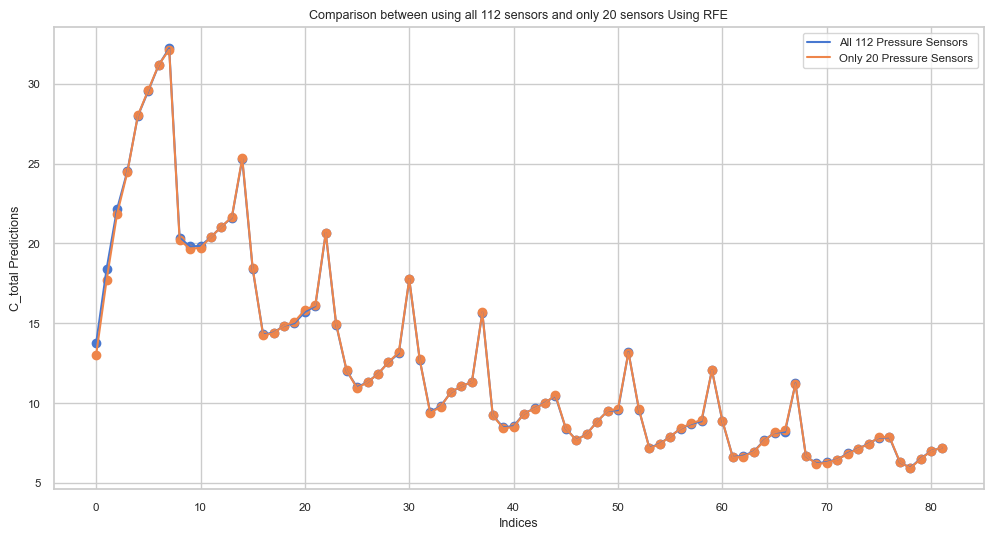

In [51]:
plt.figure(figsize=(12, 6))

plt.plot(np.arange(len(c_total_predictions)), c_total_predictions, label='All 112 Pressure Sensors')
plt.plot(np.arange(len(RFE_c_total_predictions_p4)), RFE_c_total_predictions_p4, label='Only 20 Pressure Sensors')
plt.scatter(np.arange(len(c_total_predictions)), c_total_predictions)
plt.scatter(np.arange(len(RFE_c_total_predictions_p4)), RFE_c_total_predictions_p4)

plt.xlabel('Indices')
plt.ylabel('C_total Predictions')
plt.title('Comparison between using all 112 sensors and only 20 sensors Using RFE')
plt.legend()

plt.show()

Visually, RFE predictions appear to be aligning **more closely** with the pattern of the original prediction than FIR. However, further evaluation is advisible.

#### Quantifying 

In [52]:
RFE_sum_of_differences = np.sum(np.abs(c_total_predictions - RFE_c_total_predictions_p4))
RFE_MSE = mean_squared_error(c_total_predictions,RFE_c_total_predictions_p4)
print("Mean Squared Error between the 112-Sensor Model and the 20-Sensor Model:")
print(RFE_MSE)
print()
print("Total sum of Errors between the 112-Sensor Model and the 20-Sensor Model:")
print(RFE_sum_of_differences)

Mean Squared Error between the 112-Sensor Model and the 20-Sensor Model:
0.015779249139207994

Total sum of Errors between the 112-Sensor Model and the 20-Sensor Model:
4.600353647258768


## Selection

### Inspection of Selected Sensors

A visual inspection of the pressure sensors selected by each algorithm is to be conducted.

The inspection will be conducted by highlighting the selected columns in Parallel Coordinate Plot. In this way, the choices of both algorithms would be more interpretable, as the plot results can then be intuitively explained.

#### Inspection of FIR's selection

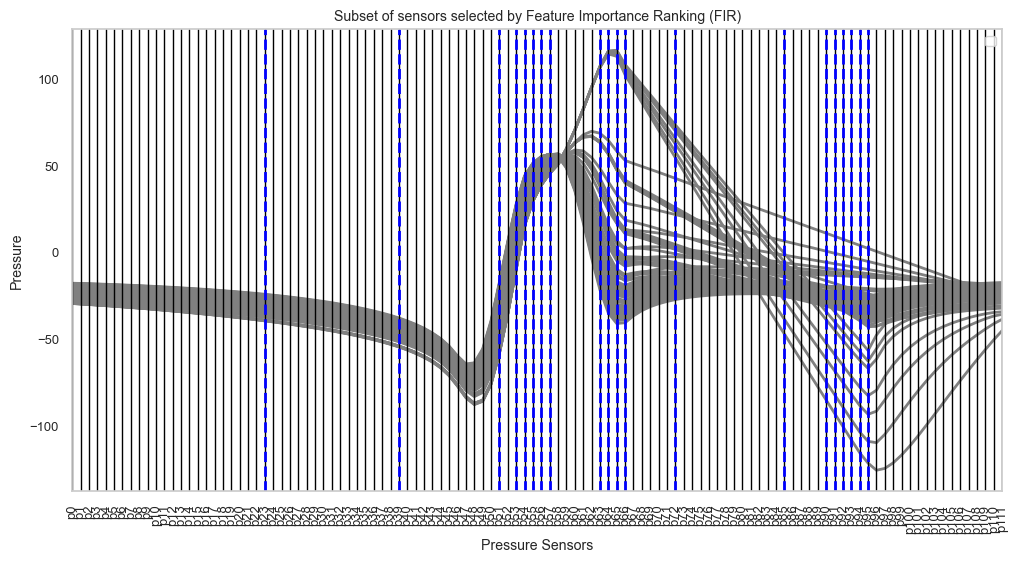

In [53]:
sns.set(style='whitegrid', palette='muted', font_scale=0.85)

plt.figure(figsize=(12, 6))
parallel_coordinates(p3_df, class_column='ctotal', color='grey', linewidth=2)

# Highlighting the selected columns by changing their line style
for col in FIR_selected_columns:
    plt.axvline(x=p3_df.columns.get_loc(col), color='blue', linestyle='dashed', linewidth=2)

plt.xticks(rotation=90)
plt.title('Subset of sensors selected by Feature Importance Ranking (FIR)')
plt.xlabel('Pressure Sensors')
plt.ylabel('Pressure')
plt.legend([])
plt.show()

#### Inspection of RFE's selection

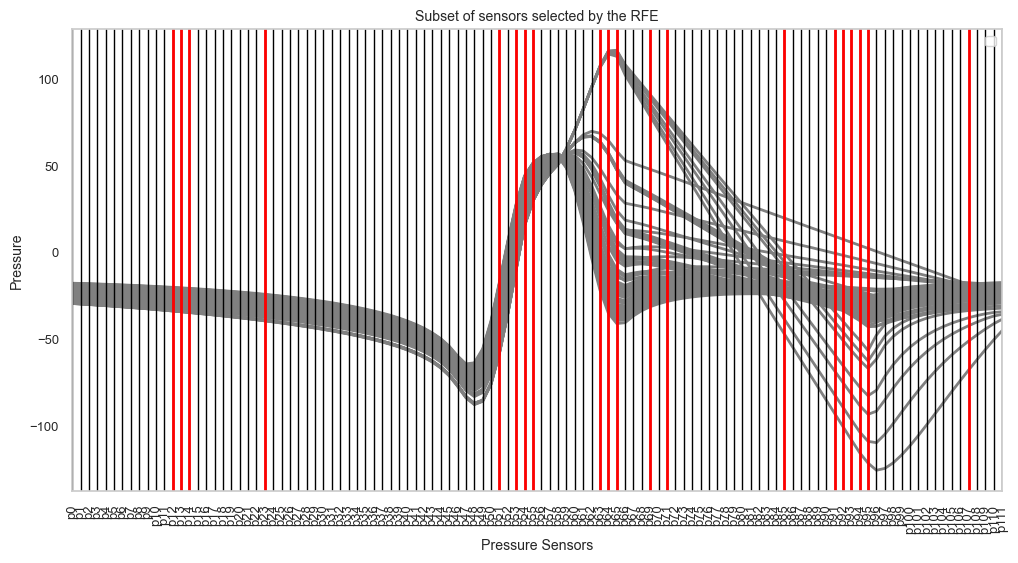

In [54]:
sns.set(style='whitegrid', palette='muted', font_scale=0.85)

plt.figure(figsize=(12, 6))
parallel_coordinates(p3_df, class_column='ctotal', color='grey', linewidth=2)

# Highlighting specific columns by changing their line style
for col in RFE_selected_columns:
    plt.axvline(x=p3_df.columns.get_loc(col), color='red', linestyle='solid', linewidth=2)

plt.xticks(rotation=90)
plt.title('Subset of sensors selected by the RFE')
plt.xlabel('Pressure Sensors')
plt.ylabel('Pressure')
plt.legend([])
plt.show()

#### Both Selections:

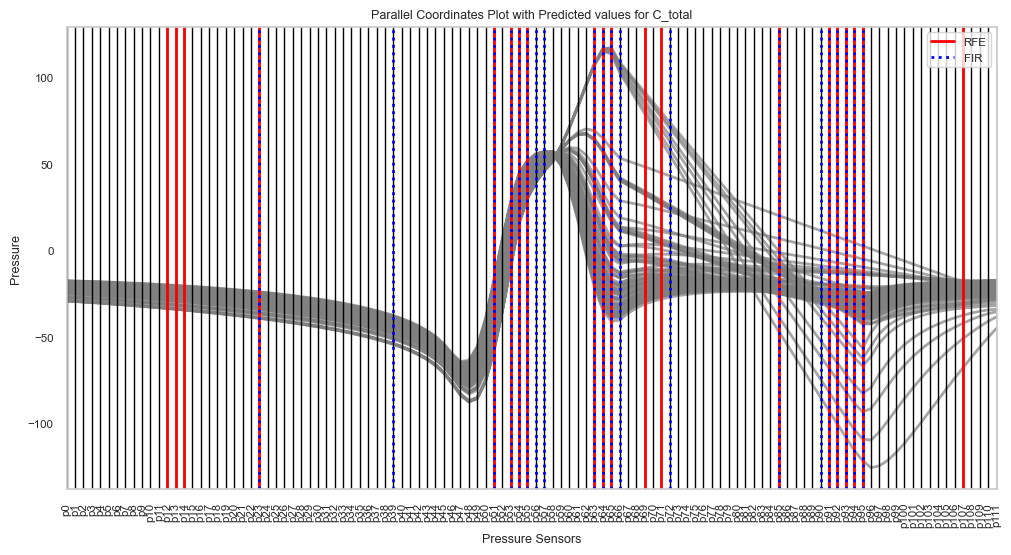

In [55]:
sns.set(style='whitegrid', palette='muted', font_scale=0.75)

plt.figure(figsize=(12, 6))
ax = parallel_coordinates(p3_df, class_column='ctotal', color= 'grey',linewidth=2, alpha=0.7)

for i, (columns, color, label, linestyle) in enumerate([(RFE_selected_columns, 'red', 'RFE','solid'),
                                             (FIR_selected_columns, 'blue', 'Feature Importance', 'dotted')]):
    for col in columns:
        ax.axvline(x=p3_df.columns.get_loc(col), color=color, linestyle=linestyle, linewidth=2, label=label if i == 0 else '')

plt.xticks(rotation=90)
plt.title('Parallel Coordinates Plot with Predicted values for C_total')
plt.xlabel('Pressure Sensors')
plt.ylabel('Pressure')

# Manually set legend labels with specific colors
legend_labels = ['RFE', 'FIR']
legend_colors = ['red', 'blue']
legend_linestyles = ['solid', 'dotted']

# Create custom legend with specific colors
custom_legend = [plt.Line2D([0], [0], color=legend_colors[i],
                            linestyle=legend_linestyles[i],
                            linewidth=2) for i in range(len(legend_labels))]

plt.legend(custom_legend, legend_labels, loc='upper right')


plt.show()

From these plots, a few things can be noticed: 
- There are **14 Shared Selected Sensors** between both algorithms, indicating their strongest influence on the predictions. 
- The RFE model is putting more focus on the first subset surface area of the vehicle ($p_0$ to $p_\text{30}$), by including **three more** sensors than FIR in that region.
- The FIR model is putting more focus on the middle subset surface area ($p_\text{38}$ to $p_\text{72}$), by including **three more** sensors than RFE in that region.
- The RFE model has also selected a sensor from the very last subset surface area (which correlates strongly with the first subset surface area), which FIR did not.


#### Comparing Quantitative Results

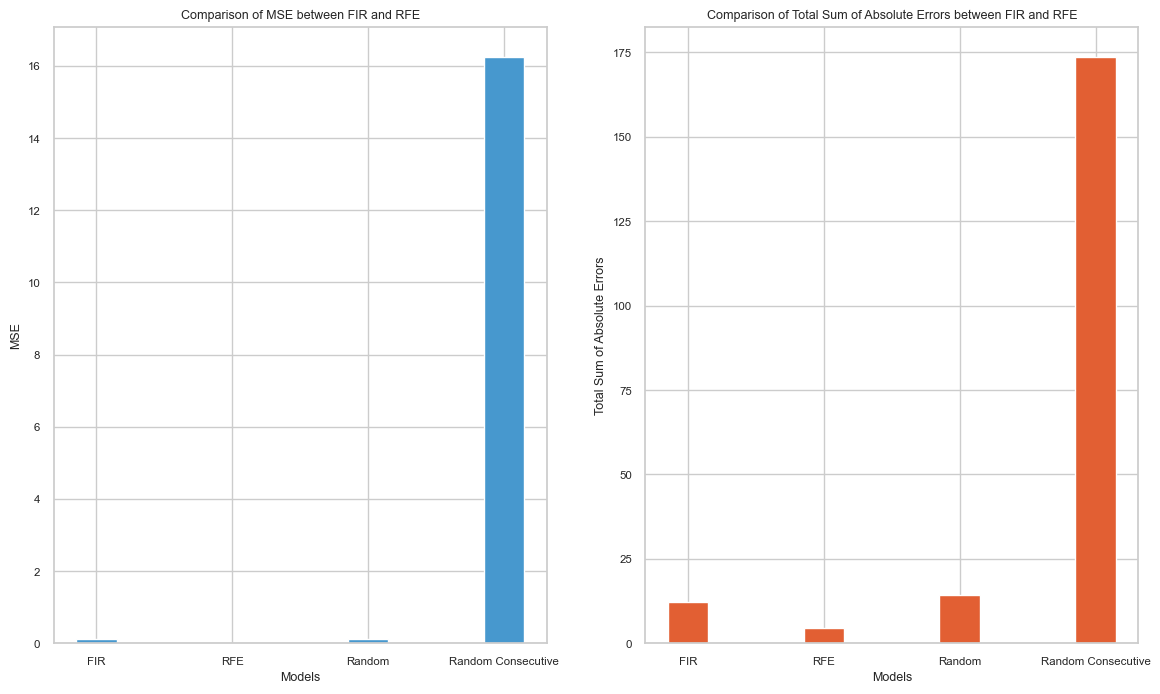

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

palette = sns.color_palette("icefire", 5)

# Define the width of the bars
bar_width = 0.30
index = np.arange(4)
    
plt.subplot(121)
plt.bar(index, [FIR_MSE, RFE_MSE, Random_MSE, Random_consec_MSE], bar_width, label='MSE', color=palette[0])
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Comparison of MSE between FIR and RFE')
plt.xticks(index,  ['FIR', 'RFE', 'Random', 'Random Consecutive'])

    
plt.subplot(122)
plt.bar(index, [FIR_sum_of_differences, RFE_sum_of_differences, Random_sum_of_differences, Random_consec_sum_of_differences],
        bar_width, label='Sum of Errors', color=palette[4])
plt.xlabel('Models')
plt.ylabel('Total Sum of Absolute Errors')
plt.title('Comparison of Total Sum of Absolute Errors between FIR and RFE')
plt.xticks(index,  ['FIR', 'RFE', 'Random', 'Random Consecutive'])

plt.show()

As it can be seen both: **visually** and **quantitatively**, the **RFE** Method performs better than the **FIR** Method.

It can also be seen that the **Random selection** model is producing good results. One reason for that is that the randomly selected sensors are usually scattered which gives the model a general idea of how the whole system behaves. Unlike the **Random Consecutive**, where the model selects 20 consecutive sensors (looking at a specific area on the surface), producing bad results.

## P4 Answer

In [57]:
print("RFE Selected Columns: ", list(RFE_selected_columns))

RFE Selected Columns:  ['p12', 'p13', 'p14', 'p23', 'p51', 'p53', 'p54', 'p55', 'p63', 'p64', 'p65', 'p69', 'p71', 'p85', 'p91', 'p92', 'p93', 'p94', 'p95', 'p107']


The <u>**subset**</u> of pressure sensors that are chosen based on the RFE model are as follows:



<table>
  <tr>
    <td>
        <ul>
            <li>$p_\text{12}$</li>
            <li>$p_\text{13}$</li>
            <li>$p_\text{14}$</li>
            <li>$p_\text{23}$</li>
        </ul>
    </td>
    <td>
        <ul>
            <li>$p_\text{51}$</li>
            <li>$p_\text{53}$</li>
            <li>$p_\text{54}$</li>
            <li>$p_\text{55}$</li>
        </ul>
    </td>
    <td>
        <ul>
            <li>$p_\text{63}$</li>
            <li>$p_\text{64}$</li>
            <li>$p_\text{65}$</li>
        </ul>
    </td>  
    <td>
        <ul>
            <li>$p_\text{69}$</li>
            <li>$p_\text{71}$</li>
        </ul>
    </td>
    <td>
        <ul>
            <li>$p_\text{85}$</li>
            <li>$p_\text{91}$</li>
            <li>$p_\text{92}$</li>
            <li>$p_\text{93}$</li>
            <li>$p_\text{94}$</li>
            <li>$p_\text{95}$</li>
        </ul>
    </td>
    <td>
        <ul>
            <li>$p_\text{107}$</li>
        </ul>
    </td>
  </tr>
</table>


#### Populating $c_\text{total}$ in P4 sheet:

In [58]:
P4_answer =  pd.read_excel(file_path, sheet_name="P4")

In [59]:
P4_answer['ctotal'] = RFE_c_total_predictions_p4

In [60]:
P4_answer

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38,p39,p40,p41,p42,p43,p44,p45,p46,p47,p48,p49,p50,p51,p52,p53,p54,p55,p56,p57,p58,p59,p60,p61,p62,p63,p64,p65,p66,p67,p68,p69,p70,p71,p72,p73,p74,p75,p76,p77,p78,p79,p80,p81,p82,p83,p84,p85,p86,p87,p88,p89,p90,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100,p101,p102,p103,p104,p105,p106,p107,p108,p109,p110,p111,ctotal
0,-28.982658,-29.288567,-29.590267,-29.904104,-30.231222,-30.569240,-30.918127,-31.278296,-31.650967,-32.034700,-32.429436,-32.835625,-33.257410,-33.695896,-34.143692,-34.606216,-35.082405,-35.572170,-36.077640,-36.598930,-37.135410,-37.688470,-38.259235,-38.840622,-39.415115,-40.101925,-40.774574,-41.473110,-42.202076,-42.963997,-43.762066,-44.599230,-45.467636,-46.434790,-47.443874,-48.521168,-49.679577,-50.937534,-52.304504,-53.786150,-55.553207,-57.515953,-59.795220,-62.465454,-65.883250,-70.309440,-76.2978,-82.923920,-86.892365,-85.055214,-75.202240,-57.367660,-34.675380,-9.126734,16.0865,30.2359,39.4239,46.1471,51.5582,60.230545,71.028060,83.017540,95.493540,107.111820,114.950645,113.586390,102.85500,94.928730,86.907670,78.959590,70.949080,62.953438,54.988605,47.093315,39.159527,31.234838,23.311392,15.433975,7.681647,-0.162053,-7.978916,-15.797398,-23.616472,-31.433190,-39.191734,-46.767776,-54.431150,-62.078950,-69.726080,-77.372550,-85.017320,-92.659960,-100.302700,-107.947510,-115.452670,-121.452350,-125.573970,-124.501434,-121.291855,-116.791626,-111.429290,-105.518654,-99.287540,-92.897766,-86.463770,-80.070560,-73.797485,-67.674126,-61.697840,-55.854977,-50.213554,-44.903580,13.022935
1,-29.016563,-29.316793,-29.619753,-29.934702,-30.261896,-30.600769,-30.950520,-31.311130,-31.682945,-32.067642,-32.463432,-32.869610,-33.282024,-33.721306,-34.170326,-34.631400,-35.107210,-35.597730,-36.102184,-36.622536,-37.159560,-37.712185,-38.281357,-38.864320,-39.439888,-40.115420,-40.791817,-41.489906,-42.218120,-42.979420,-43.777027,-44.614456,-45.489475,-46.454384,-47.463974,-48.541290,-49.697388,-50.953728,-52.319878,-53.791390,-55.568330,-57.531560,-59.808678,-62.480625,-65.891110,-70.312400,-76.2982,-82.926254,-86.885880,-85.078540,-75.240800,-57.333050,-34.683685,-9.137894,16.0178,30.1909,39.3875,46.1114,51.5153,60.193750,70.992455,83.017296,95.527540,107.232280,115.254100,114.224560,103.94800,96.420135,88.800130,81.248825,73.638690,66.042610,58.475597,50.974690,43.437393,35.908638,28.380770,20.875395,13.418560,5.962456,-1.485198,-8.925967,-16.357244,-23.743973,-31.068600,-38.281803,-45.551434,-52.820320,-60.083904,-67.347300,-74.609010,-81.864190,-89.135130,-96.343220,-103.459740,-108.883040,-109.642690,-104.821560,-98.553330,-92.034836,-85.632750,-79.514940,-73.762830,-68.410324,-63.458100,-58.905140,-54.750970,-50.919327,-47.351913,-43.996887,-40.925630,-38.354637,17.696409
2,-29.041150,-29.337421,-29.640186,-29.956928,-30.285269,-30.624146,-30.974575,-31.336990,-31.710373,-32.095085,-32.492744,-32.900597,-33.323586,-33.760600,-34.209908,-34.671947,-35.149605,-35.641150,-36.146786,-36.669440,-37.207660,-37.761433,-38.330994,-38.897163,-39.534620,-40.185593,-40.856117,-41.554620,-42.283607,-43.045113,-43.842278,-44.675133,-45.552498,-46.519370,-47.525234,-48.602325,-49.759686,-51.013626,-52.375378,-53.895195,-55.634100,-57.596287,-59.873173,-62.523193,-65.958954,-70.383750,-76.3554,-83.012800,-86.977830,-85.158230,-75.296104,-57.445060,-34.796700,-9.281578,16.0799,30.1826,39.3670,46.0890,51.4927,60.175617,71.004486,83.019940,95.601380,107.417600,115.667670,115.062940,105.36100,98.338740,91.206440,84.081085,76.995380,69.922390,62.880028,55.873703,48.843075,41.817894,34.816113,27.861101,20.972752,14.028173,7.097643,0.165666,-6.766417,-13.673396,-20.538094,-27.338333,-34.146110,-40.951607,-47.748180,-54.539787,-61.321014,-68.088010,-74.877014,-81.557190,-88.161410,-93.253170,-91.452680,-84.975470,-78.112366,-71.846985,-66.286480,-61.382713,-57.064300,-53.263435,-49.913055,-

In [61]:
#write_excel(file_path,'P4',P4_answer)